Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: colwise* >left is a 4x1 matrix but right is a 4x1 matrix
Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: colwise* >left is a 4x1 matrix but right is a 4x1 matrix


[[ 0.0329297 ]
 [ 0.00868333]
 [ 0.28621005]]


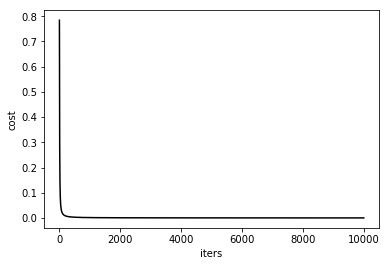

In [1]:
import numpy as np
import pyCalc as p
import random
p.setMode("quiet")
xs = p.var("constant",np.array([
                                   [1,0,0],
                                   [1,1,0],
                                   [1,0,1],
                                   [1,1,1]
                               ]
                               , dtype= float))
ys = p.var("constant", np.array(
                                [0,0,1,1]
                                , dtype=float))
half = p.var("constant", np.array(
                                [
                                   0.5
                               ]
                                , dtype=float))
np.random.seed(1)
weights =2*np.random.random((3,1)) - 1
ws = p.var("independent", 3,1)

l0 = p.function(xs,ws, "*") #4x1
l1 = p.function(l0, "sigmoid") #4x1
l1_error = p.function(ys.T(), l1, "-")#4x1
sq_err = p.function(l1_error, l1_error, "colwise*")#4x1
cost = p.function(p.function(sq_err,half,"*"),"colsum")


sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l1_error, "colwise*")
tmp = p.function(xs.T(),l1_delta, "*")
print(tmp.value(dict([(ws,weights)])))
csh= []
wsh = []
outs =[]
for i in range(10000):
    weights = weights + tmp.value(dict([(ws,weights)]))
    csh.append(np.sum(cost.value()))
    outs.append(l1.value().tolist())
    wsh.append(weights.tolist())


import matplotlib.pyplot as plt
x_data = [i for i in range(len(csh))]
y_data_whs = [[wsh[i][j] for i in range(len(wsh))] for j in range(len(wsh[0]))]
y_data_outs = [[outs[i][j] for i in range(len(outs))] for j in range(len(outs[0]))]
plt.figure(1)
plt.subplot(111)
plt.ylabel('cost')
plt.xlabel('iters')
plt.plot(x_data, csh, 'k')
    
plt.show()

In [2]:
l1.value()

array([[ 0.00966889],
       [ 0.00786606],
       [ 0.99358858],
       [ 0.99211648]])

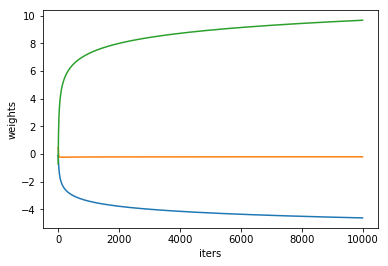

In [3]:
plt.subplot(111)
plt.ylabel('weights')
plt.xlabel('iters')
for d in y_data_whs:
    plt.plot(x_data, d)
    
plt.show()

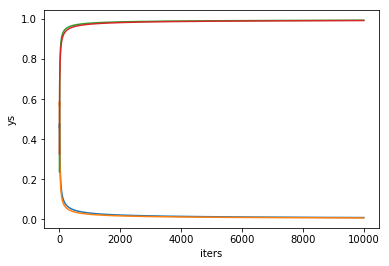

In [4]:
plt.subplot(111)
plt.ylabel('ys')
plt.xlabel('iters')
for d in y_data_outs:
    plt.plot(x_data, d)

plt.show()